In [ ]:
# importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Assignments\\Logistic Regression\\Titanic_train.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# checking for null values 

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.shape

(891, 12)

In [14]:
df = df.drop('Cabin', axis = 1)

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
# data imputation 

In [16]:
from sklearn.impute import KNNImputer

In [17]:
knn_imputer = KNNImputer(n_neighbors=5)
df[['Age']] = knn_imputer.fit_transform(df[['Age']])

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df1 = df.drop(['Name', 'Ticket'], axis = 1)

In [21]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
# Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
df1['Sex'] = le.fit_transform(df1['Sex'])

In [ ]:
# model building

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
X = df1[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
y = df1["Survived"]

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred = lr.predict(X)

In [31]:
y_pred_df1= pd.DataFrame({'actual': y,
                         'predicted_prob': lr.predict(X)})

In [32]:
y_pred_df1

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,1


In [ ]:
# checking model performance

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix = confusion_matrix(y, y_pred)

In [35]:
print(confusion_matrix)

[[462  87]
 [ 96 244]]


              precision    recall  f1-score   support

           0       0.83      0.84      0.83       549
           1       0.74      0.72      0.73       340

    accuracy                           0.79       889
   macro avg       0.78      0.78      0.78       889
weighted avg       0.79      0.79      0.79       889



Text(0, 0.5, 'True Positive Rate')

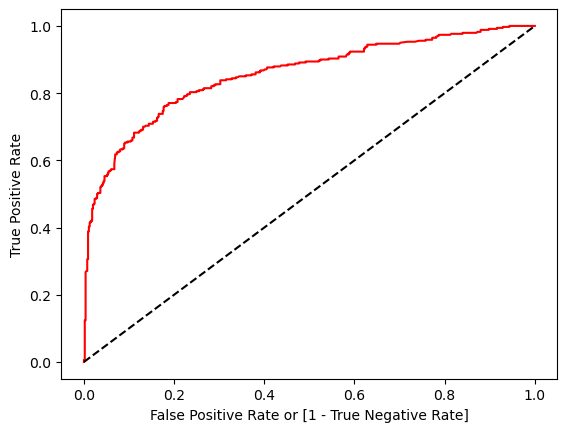

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

fpr, tpr, thresholds = roc_curve(y, lr.predict_proba (X)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [37]:
auc

0.7795885567341692

In [38]:
import pickle

In [39]:
# Saving model as pkl file
with open("titanic_logistic_model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [40]:
print("Model trained and saved. Accuracy:", accuracy_score(y_test, lr.predict(X_test)))

Model trained and saved. Accuracy: 0.7921348314606742


# Interveiw Q/A